<a href="https://colab.research.google.com/github/Dih08/projetos-simples-e-aleatorios/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
import keras
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models




In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [ ]:
#separando as categorias
categorias = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(np.unique(y_train))

classes

0- airplane
1- automobile
2- bird
3- cat
4- deer
5- dog
6-frog
7- horse
8- ship
9- truck

In [ ]:
def classes_esquecidas(pred):
  dic = {0:'Airplane',
         1:'Automobile',
         2:'Bird',
         3:'Cat',
         4:'Deer',
         5:'Dog',
         6:'Frog',
         7:'Horse',
         8:'Ship',
         9:'Truck'
         }

  return dic[np.argmax(pred)]


In [ ]:
#plotando as imagens
plt.figure(figsize=(10,10))
for i in range(num_classes):
  axes = plt.subplot(3,5,i+1)
  idx = np.where(y_train[:]==i)[0]
  x = x_train[idx,::]
  plt.imshow(x[0])
  axes.set_title(categorias[i])
  plt.axis('off')


In [ ]:
plt.hist(y_train, rwidth= 0.5)

In [ ]:
plt.hist(y_test, rwidth= 0.5)

In [ ]:
type(x_train)

In [ ]:
print(len(x_train))
print(len(x_test))

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
#one hot encode

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [ ]:
i = np.random.randint(low = 0, high = 3000)
y_test[i]
plt.imshow(x_test[i])
print(y_test[i])
print(classes_esquecidas(y_test[i]))



In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
#compilar o modelo
opt = keras.optimizers.Adagrad()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#callbacks
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + (datetime.datetime.now()+ datetime.timedelta(hours=-3)).strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,verbose=2)

In [ ]:
#fitando o modelo
seed = 21
np.random.seed(seed)
epochs = 10
batch_size =32
History = model.fit(x_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(x_test,y_test),
          callbacks=[tensorboard_callback,stopper])


In [ ]:
model.save('Cifar10')

In [ ]:
i = 1007
pred = model.predict(tf.expand_dims(x_test[i],0))
plt.imshow(x_test[i])
print(classes_esquecidas(pred))



# Como nao foi tão boa a acuracia dos dados entao vamos usar a Transferlearning usando a VGG16

In [ ]:
from keras.applications.vgg16 import VGG16



vgg16_model = VGG16(weights= 'imagenet',include_top= False , input_shape=(32,32,3))




In [ ]:
model2 =keras.Sequential()
for layer in vgg16_model.layers:
  model2.add(layer)

In [ ]:
model2.summary()

In [ ]:
#congelando os parametros que nao vou treinar

for layer in model2.layers:
  layer.trainable = False

In [ ]:
model2.summary()

In [ ]:
#adicionando um layer no final
model2.add(layers.Flatten())
model2.add(layers.Dense(300,activation='relu'))
model2.add(layers.Dense(10,activation='softmax'))

In [ ]:
model2.summary()

In [ ]:
model2.output

In [ ]:
#callbacks : early stopping

stopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20,verbose=2)

In [ ]:
#vamos complilar o modelo2
opt = keras.optimizers.SGD()
model2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
#treinar modelo
input_test = tf.keras.applications.vgg16.preprocess_input(x_test)
input_train = tf.keras.applications.vgg16.preprocess_input(x_train)

In [ ]:
#agoras vamos fitar
model2.fit(input_train,
          y_train,
          epochs=10,
          batch_size=32,
          validation_data=(input_test,y_test),
          callbacks=[stopper])

Epoch 1/10
1563/1563 [==============================] - 454s 290ms/step - loss: 2.3844 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 456s 292ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 454s 290ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 4/10
1563/1563 [==============================] - 449s 287ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 459s 294ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 461s 295ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 461s 295ms/step - loss: 2.3027 - accuracy: 0.0973 - val_

In [ ]:
#agora testando uma imagem aleatoria

i = random.randint(0,10000)
pred = model2.predict(tf.expand_dims(x_test[i],0))
plt.imshow(x_test[i])
print(classes_esquecidas(pred))

# Usando agora a VGG

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import decode_predictions

In [ ]:
img = keras.preprocessing.image.load_img('image.jpg', target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = img_array.reshape(1,224,224,3)
img_zoada = preprocess_input(img_array)



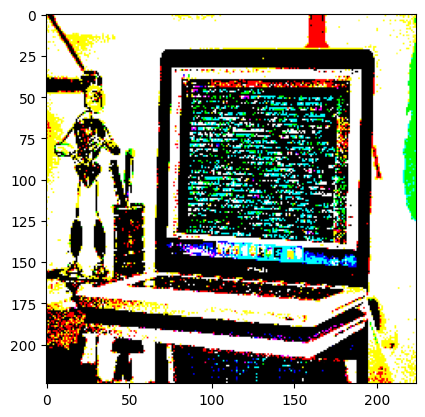

In [ ]:
plt.imshow(img)
plt.imshow(img_zoada[0,:,:,:])

In [ ]:
model = VGG19()
yhat = model.predict(img_zoada)
label = decode_predictions(yhat, top= 10)
label

1/1 [==============================] - 1s 803ms/step


[[('n04243546', 'slot', 0.058206905),
  ('n03998194', 'prayer_rug', 0.056537576),
  ('n02699494', 'altar', 0.05627794),
  ('n03642806', 'laptop', 0.0442124),
  ('n03602883', 'joystick', 0.043507177),
  ('n02666196', 'abacus', 0.041782066),
  ('n03180011', 'desktop_computer', 0.028132165),
  ('n03782006', 'monitor', 0.026670408),
  ('n03598930', 'jigsaw_puzzle', 0.021716608),
  ('n04404412', 'television', 0.02155658)]]